<a href="https://colab.research.google.com/github/cchewpt/EDA-with-python/blob/main/A01_DataManipulate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 1

จงเขียนโค๊ดเพื่อตอบคำถามจากชุดข้อมูล [airline royalty](https://www.kaggle.com/datasets/agungpambudi/airline-loyalty-campaign-program-impact-on-flights/data)
---



# ชีวภัทร ติดสุข 1640703664

In [2]:
!wget https://raw.githubusercontent.com/wichukornk/TrainingDataset/main/Customer-Flight-Activity.csv

!wget https://raw.githubusercontent.com/wichukornk/TrainingDataset/main/Customer-Loyalty-History.csv

--2024-02-06 07:43:02--  https://raw.githubusercontent.com/wichukornk/TrainingDataset/main/Customer-Flight-Activity.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12762099 (12M) [text/plain]
Saving to: ‘Customer-Flight-Activity.csv’

Customer-Flight-Act 100%[===================>]  12.17M  66.4MB/s    in 0.2s    

2024-02-06 07:43:03 (66.4 MB/s) - ‘Customer-Flight-Activity.csv’ saved [12762099/12762099]

--2024-02-06 07:43:03--  https://raw.githubusercontent.com/wichukornk/TrainingDataset/main/Customer-Loyalty-History.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP reques

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
cl = pd.read_csv("Customer-Loyalty-History.csv")
cf = pd.read_csv("Customer-Flight-Activity.csv")

1 หารหัสลูกค้า (Loyalty Number) ที่มีค่าเฉลี่ย(mean)ของระยะทางการบิน (Distance) สูงที่สุด (0.6 points)

In [4]:
cfMean = cf.groupby("Loyalty Number")["Distance"].mean()
loyalty_number = cfMean.idxmax()
print(f"Loyalty Number ที่มีค่าเฉลี่ยของระยะทางการบินสูงสุดคือ Loyalty Number ที่ {loyalty_number}")

Loyalty Number ที่มีค่าเฉลี่ยของระยะทางการบินสูงสุดคือ Loyalty Number ที่ 241144


2 หาค่าเฉลี่ย (mean) ระยะทางการบิน (Distance) รายบุคคลของบุคคลแต่ละเพศ (Gender) (0.6 points)

In [5]:
df = pd.merge(cl,cf, on="Loyalty Number")
dfMean = df.groupby("Gender")["Distance"].mean()
print(dfMean)

Gender
Female    1204.586987
Male      1213.208328
Name: Distance, dtype: float64


3 หาความสัมพันธ์ระหว่างผลรวมรายลูกค้าของ Total Flights และ Points Redeemed พร้อมอธิบายผลที่เกิดขึ้น (0.8 points)

<ipython-input-6-32899af1faef>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dfSum = df.groupby("Loyalty Number")["Total Flights","Points Redeemed"].sum()


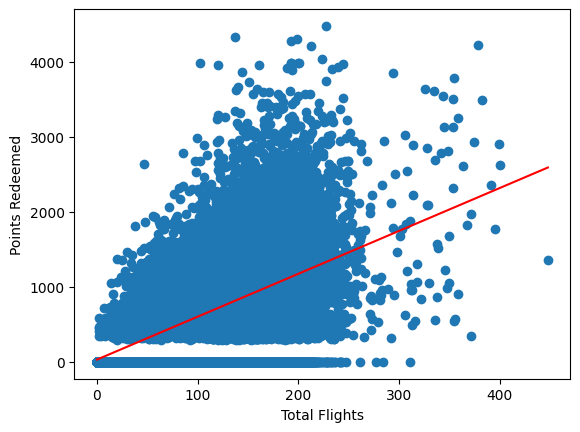

Correlation coefficient: 0.5395473071129483


In [6]:
dfSum = df.groupby("Loyalty Number")["Total Flights","Points Redeemed"].sum()


correlation = dfSum['Total Flights'].corr(dfSum['Points Redeemed'])

plt.scatter(dfSum['Total Flights'], dfSum['Points Redeemed'])
plt.plot(np.unique(dfSum['Total Flights']), np.poly1d(np.polyfit(dfSum['Total Flights'], dfSum['Points Redeemed'], 1))(np.unique(dfSum['Total Flights'])), color='red')
plt.xlabel('Total Flights')
plt.ylabel('Points Redeemed')
plt.show()
print("Correlation coefficient:", correlation)

จากกราฟ สรุปได้ว่าเมื่อ Point Redeemed สูงขึ้น จะทำให้ค่า Total Flight สูงขึ้นตามไปด้วย


ค่าสัมประสิทธิ์สหสัมพันธ์ (Correlation coefficient) อยู่ในช่วง -1 ถึง 1 โดยที่ค่า 0 หมายถึงไม่มีความสัมพันธ์
ค่าบวก หมายถึงมีความสัมพันธ์เชิงบวก (เมื่อค่าหนึ่งเพิ่มขึ้น อีกค่าหนึ่งมีแนวโน้มเพิ่มขึ้น)
ค่าลบ หมายถึงมีความสัมพันธ์เชิงลบ (เมื่อค่าหนึ่งเพิ่มขึ้น อีกค่าหนึ่งมีแนวโน้มลดลง)